# Library


In [ ]:
import pandas as pd
import numpy as np
import string

In [ ]:
# Loading Essential libraries
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False # this to force autocompletion

# Dataset

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Fake-Review-Detection-Spiill-AI/screnario-2---multi-task/main/dataset_preprocessing.csv',) #dataset hasil preprocessing
df.head()

,username,rate,date,label,sentimen,reviews,produk,text_length,anomaly_score,lowercase_reviews,...,no_number_reviews,no_atribut_reviews,no_repetition_reviews,no_whitespace_reviews,no_banned_reviews,no_slang_reviews,clean_reviews,tokens_reviews,stopword_reviews,stem_reviews
0,nadiadiani_,3,19-03-2021 6:58,non,neutral,"Ketahuilah apa jenis kulitmu dulu,,utamakan gu...",Acnes Creamy Wash,282,1,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",...,"ketahuilah apa jenis kulitmu dulu,,utamakan gu...",ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dulu utamakan gun...,ketahuilah apa jenis kulitmu dahulu utamakan g...,ketahuilah apa jenis kulitmu dahulu utamakan g...,"['ketahuilah', 'apa', 'jenis', 'kulitmu', 'dah...","['ketahuilah', 'jenis', 'kulitmu', 'utamakan',...",tahu jenis kulit utama produk kandung hydratin...
1,jiminee10,3,31-08-2022 5:02,fake,neutral,Salah satu facial wash dari drugstore yang lay...,Acnes Creamy Wash,167,1,salah satu facial wash dari drugstore yang lay...,...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,salah satu facial wash dari drugstore yang lay...,"['salah', 'satu', 'facial', 'wash', 'dari', 'd...","['salah', 'facial', 'wash', 'drugstore', 'laya...",salah facial wash drugstore layak coba busa ku...
2,srihastutik1987,3,2024-05-22 22:24,fake,neutral,Efek:memberikan kulit tampak lebih cerah\n Tek...,MS GLOW FACIAL WASH,103,1,efek:memberikan kulit tampak lebih cerah\n tek...,...,efek:memberikan kulit tampak lebih cerah\n tek...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,efek memberikan kulit tampak lebih cerah tekst...,"['efek', 'memberikan', 'kulit', 'tampak', 'leb...","['efek', 'kulit', 'cerah', 'tekstur', 'lembut'...",efek kulit cerah tekstur lembut nyaman asli ba...
3,Aisyah_18,3,01-11-2021 11:32,fake,neutral,cukup memuaskan dengan harga yang terjangkau ...,Acnes Creamy Wash,104,1,cukup memuaskan dengan harga yang terjangkau ...,...,cukup memuaskan dengan harga yang terjangkau ...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,cukup memuaskan dengan harga yang terjangkau d...,"['cukup', 'memuaskan', 'dengan', 'harga', 'yan...","['memuaskan', 'harga', 'terjangkau', 'kualitas...",muas harga jangkau kualitas lumayan sedia mark...
4,christinjuniarti,3,29-06-2018 1:01,trusted,neutral,Dr segi packaging sih oke2 aja dan bisa liat w...,Lip Cream LA Girl,431,1,dr segi packaging sih oke2 aja dan bisa liat w...,...,dr segi packaging sih oke aja dan bisa liat w...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dr segi packaging sih oke aja dan bisa liat wa...,dari segi packaging sih oke saja dan bisa liha...,dari segi packaging sih oke saja dan bisa liha...,"['dari', 'segi', 'packaging', 'sih', 'oke', 's...","['segi', 'packaging', 'oke', 'warna', 'produk'...",segi packaging oke warna produk dalam pas dico...


In [ ]:
!pip install transformers torch pandas sklearn


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Pastikan kolom 'stem_reviews' dalam bentuk string
df['no_whitespace_reviews'] = df['no_whitespace_reviews'].astype(str)


In [ ]:
from transformers import BertTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Inisialisasi tokenizer IndoBERT
tokenizer = BertTokenizer.from_pretrained('indobenchmark/indobert-base-p1')

# Tokenisasi teks
def tokenize_function(text):
    return tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

df['input_ids'] = df['no_whitespace_reviews'].apply(lambda x: tokenize_function(x)['input_ids'].squeeze())
df['attention_mask'] = df['no_whitespace_reviews'].apply(lambda x: tokenize_function(x)['attention_mask'].squeeze())

# Encoding label
label_encoder = LabelEncoder()
df['sentimen_encoded'] = label_encoder.fit_transform(df['sentimen'])

# Split dataset menjadi training dan test set
X = df[['input_ids', 'attention_mask']]
y = df['sentimen_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

In [ ]:
import torch
from transformers import BertModel
from torch import nn
from torch.utils.data import DataLoader, TensorDataset

# Definisikan model dengan Dropout
class IndoBERTClassifier(nn.Module):
    def __init__(self, bert_model_name, num_labels, dropout_rate=0.3):
        super(IndoBERTClassifier, self).__init__()
        self.bert = BertModel.from_pretrained(bert_model_name)
        self.dropout = nn.Dropout(dropout_rate)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_labels)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        cls_output = outputs[1]  # CLS token
        cls_output = self.dropout(cls_output)
        logits = self.classifier(cls_output)
        return logits


In [ ]:
from torch.utils.data import DataLoader, TensorDataset

# Misalkan X_train, X_test, y_train, dan y_test sudah tersedia dan terdefinisi
# Pastikan X_train['input_ids'], X_train['attention_mask'] dan y_train tersedia
# serta X_test['input_ids'], X_test['attention_mask'] dan y_test tersedia

# DataLoader untuk training dan testing
train_dataset = TensorDataset(torch.stack(X_train['input_ids'].tolist()),
                              torch.stack(X_train['attention_mask'].tolist()),
                              torch.tensor(y_train.values))

test_dataset = TensorDataset(torch.stack(X_test['input_ids'].tolist()),
                             torch.stack(X_test['attention_mask'].tolist()),
                             torch.tensor(y_test.values))

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:


# Inisialisasi model
model = IndoBERTClassifier('indobenchmark/indobert-base-p1', num_labels=len(label_encoder.classes_))

# Tentukan loss function dan optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=2e-5)

# Inisialisasi parameter untuk early stopping
patience = 2  # Jumlah epoch yang boleh dilewati tanpa perbaikan
best_loss = np.inf
epochs_no_improve = 0

def train_model_with_early_stopping(model, train_loader, test_loader, criterion, optimizer, epochs=10, patience=2):
    global best_loss
    global epochs_no_improve

    for epoch in range(epochs):
        model.train()
        total_loss = 0

        for input_ids, attention_mask, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        avg_train_loss = total_loss / len(train_loader)

        # Evaluasi pada test set
        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for input_ids, attention_mask, labels in test_loader:
                outputs = model(input_ids, attention_mask)
                loss = criterion(outputs, labels)
                total_test_loss += loss.item()

        avg_test_loss = total_test_loss / len(test_loader)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {avg_train_loss:.4f} - Test Loss: {avg_test_loss:.4f}")

        # Cek untuk early stopping
        if avg_test_loss < best_loss:
            best_loss = avg_test_loss
            epochs_no_improve = 0
            best_model = model.state_dict()  # Simpan model terbaik
        else:
            epochs_no_improve += 1
            if epochs_no_improve >= patience:
                print("Early stopping triggered!")
                model.load_state_dict(best_model)  # Load model terbaik sebelum overfitting
                break

train_model_with_early_stopping(model, train_loader, test_loader, criterion, optimizer)


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

Epoch 1/10 - Train Loss: 0.6625 - Test Loss: 0.3572
Epoch 2/10 - Train Loss: 0.2010 - Test Loss: 0.2374
Epoch 3/10 - Train Loss: 0.0937 - Test Loss: 0.2919
Epoch 4/10 - Train Loss: 0.0484 - Test Loss: 0.3110
Early stopping triggered!


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def evaluate_model(model, test_loader):
    model.eval()
    predictions, true_labels = [], []
    with torch.no_grad():
        for input_ids, attention_mask, labels in test_loader:
            outputs = model(input_ids, attention_mask)
            logits = outputs.detach().cpu().numpy()
            pred_labels = np.argmax(logits, axis=1)  # Ubah probabilitas menjadi kelas diskrit
            predictions.extend(pred_labels)
            true_labels.extend(labels.cpu().numpy())

    # Hitung dan cetak classification report
    print(classification_report(true_labels, predictions, target_names=label_encoder.classes_))

    # Hitung dan cetak accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")

# Evaluasi model dan tampilkan laporan serta akurasi
evaluate_model(model, test_loader)


              precision    recall  f1-score   support

    negative       1.00      0.89      0.94       157
     neutral       0.85      0.98      0.91       168
    positive       0.95      0.90      0.93       155

    accuracy                           0.93       480
   macro avg       0.94      0.93      0.93       480
weighted avg       0.93      0.93      0.93       480

Accuracy: 92.71%


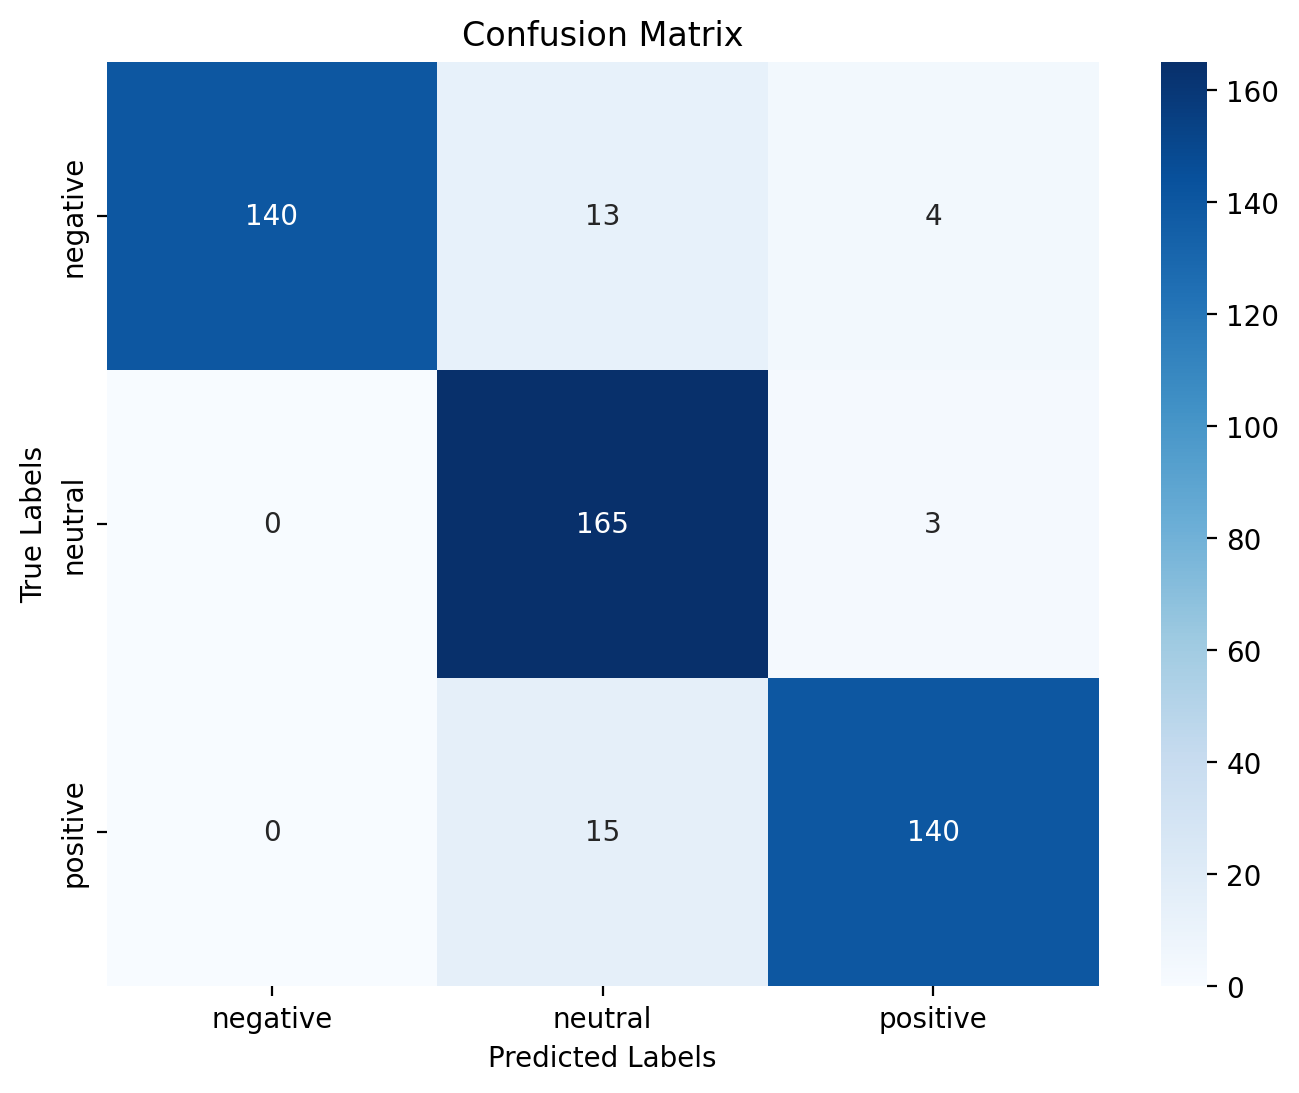

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(true_labels, pred_labels, classes):
    cm = confusion_matrix(true_labels, pred_labels)

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()



# Pastikan kamu sudah melakukan evaluasi untuk mendapatkan prediksi dan label sebenarnya
true_labels, pred_labels = [], []

model.eval()
with torch.no_grad():
    for input_ids, attention_mask, labels in test_loader:
        outputs = model(input_ids, attention_mask)
        logits = outputs.detach().cpu().numpy()
        pred_labels_batch = np.argmax(logits, axis=1)
        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(pred_labels_batch)

# Plot confusion matrix
plot_confusion_matrix(true_labels, pred_labels, classes=label_encoder.classes_)


In [ ]:
def predict_text_class(text, model, tokenizer, label_encoder):
    # Tokenisasi teks
    inputs = tokenizer(text, padding='max_length', truncation=True, max_length=128, return_tensors="pt")

    # Model evaluasi
    model.eval()
    with torch.no_grad():
        outputs = model(inputs['input_ids'], inputs['attention_mask'])

    # Softmax untuk mendapatkan probabilitas
    probabilities = torch.nn.functional.softmax(outputs, dim=1)

    # Ambil nilai probabilitas maksimum
    predicted_prob, predicted_class_idx = torch.max(probabilities, dim=1)

    # Konversi indeks ke nama kelas
    predicted_class = label_encoder.inverse_transform(predicted_class_idx.cpu().numpy())[0]
    predicted_prob = predicted_prob.item()

    # Mendapatkan probabilitas untuk setiap kelas
    all_probabilities = {label_encoder.classes_[i]: prob for i, prob in enumerate(probabilities.squeeze().cpu().numpy())}

    return predicted_class, predicted_prob, all_probabilities



In [ ]:
# Menggunakan fungsi predict_text_class dengan input langsung dari pengguna
text_input = input("Masukkan teks review produk yang ingin diprediksi: ")
predicted_class, predicted_prob, all_probabilities = predict_text_class(text_input, model, tokenizer, label_encoder)

print(f"\nTeks: {text_input}")
print(f"Prediksi Kelas: {predicted_class} ({predicted_prob*100:.2f}%)")
print("Probabilitas untuk setiap kelas:")
for cls, prob in all_probabilities.items():
    print(f"{cls}: {prob*100:.2f}%")


Masukkan teks review produk yang ingin diprediksi: semoga baik baik saja karena skincare ini bagus untuk kulit saya

Teks: semoga baik baik saja karena skincare ini bagus untuk kulit saya
Prediksi Kelas: positive (52.90%)
Probabilitas untuk setiap kelas:
negative: 0.15%
neutral: 46.96%
positive: 52.90%


In [ ]:
!pip install gradio


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.1 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local

In [ ]:
# Fungsi prediksi untuk Gradio
def predict_review(text):
    predicted_class, predicted_prob, all_probabilities = predict_text_class(text, model, tokenizer, label_encoder)

    # Format output
    result = f"Prediksi Kelas: {predicted_class} ({predicted_prob*100:.2f}%)\n"
    result += "Probabilitas untuk setiap kelas:\n"
    for cls, prob in all_probabilities.items():
        result += f"{cls}: {prob*100:.2f}%\n"

    return result

import gradio as gr

# Definisikan Gradio
interface = gr.Interface(
    fn=predict_review,  # Fungsi yang akan dijalankan
    inputs=gr.Textbox(lines=5, placeholder="Masukkan teks review di sini..."),  # Input textbox untuk memasukkan teks
    outputs="text",  # Output berupa teks
    title="IndoBERT Review Classifier",
    description="Masukkan teks review produk dan model akan memprediksi kelas review tersebut."
)

interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://6d92d63b9dbc8b8954.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
